# Import data and libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from latent_ideology.latent_ideology_class import latent_ideology as li
import matplotlib.pyplot as plt
import pandas as pd
from utils import *


n_cop = '2x'
folder = '/Users/alessiogandelli/data/cop' + str(n_cop) + '/'
retweet_df_path = folder + 'cache/retweets_labeled_cop'+str(n_cop)+'.pkl'
projected_path = folder + 'networks/cop' + str(n_cop) +'_retweet_network_ml.gml'
retweet_df = pd.read_pickle(retweet_df_path)
# drop cop 22
retweet_df = retweet_df[retweet_df['cop'] != 'cop22']

# drop topic -1
retweet_df = retweet_df[retweet_df['topic'] != -1]

topic_label = json.load(open(folder + 'cache/labels_cop'+str(n_cop)+'.json'))
topic_label = {int(k): v for k, v in topic_label.items()}# key float to int

mln = ml.read(projected_path)   # multilayer network

layers = ml.to_nx_dict(mln) # dictionary where we have a networkx graph for each layer
layers = {int(float(k)): v for k, v in layers.items()} #


cop_topic = retweet_df.groupby(['cop','topic']).count()['author'].reset_index()
cop_topic = cop_topic.pivot(index='cop', columns='topic', values='author')
cop_topic = cop_topic.div(cop_topic.sum(axis=0), axis=1)#norm

# compute polarization 

Layer:  11
Number of nodes:  14298
Number of edges:  16054
99  influencers
8448  users connected to influencers
Layer  11  has too few data to be analyzed with dip test
Layer:  29
Number of nodes:  3879
Number of edges:  3922
98  influencers
2625  users connected to influencers
Layer  29  has too few data to be analyzed with dip test
Layer:  14
Number of nodes:  10922
Number of edges:  11388
96  influencers
6209  users connected to influencers
Layer  14  has too few data to be analyzed with dip test
Layer:  4
Number of nodes:  27766
Number of edges:  30446
97  influencers
12080  users connected to influencers
Layer:  22
Number of nodes:  7891
Number of edges:  8432
98  influencers
5173  users connected to influencers
Layer:  47
Number of nodes:  2023
Number of edges:  1838
95  influencers
1183  users connected to influencers
Layer  47  has too few data to be analyzed with dip test
Layer:  34
Number of nodes:  2984
Number of edges:  2705
95  influencers
1509  users connected to influenc

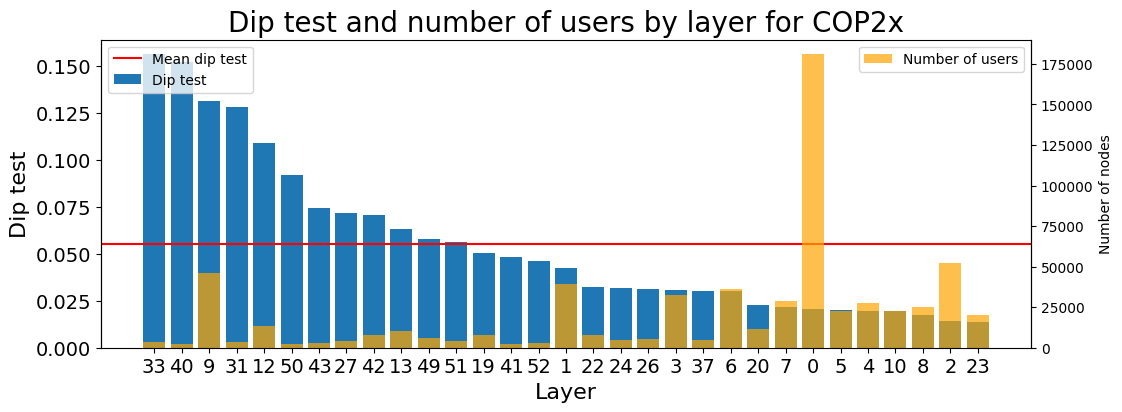

[(33, 'Plastic Waste Recycling'), (40, 'Blogging on Climate Change and COP'), (9, 'Electric Vehicle Emissions and Sustainable Transport'), (31, 'Arts and Films for Climate Change'), (12, 'Canadian Fossil Fuel Funding'), (50, 'Nordic Climate Solutions'), (43, 'Climate Justice and Racial Injustice'), (27, 'Climate Change Negotiations'), (42, 'Vaccines and COVID-19 Safety for Delegates'), (13, 'African Climate Change and COP'), (49, 'Climate Change Advocacy by Sir David Attenborough'), (51, 'Greta Thunberg Activism'), (19, 'China-Russia Climate Cooperation'), (41, 'Nuclear Power and Climate Change'), (52, 'Climate Change and Social Media Engagement'), (1, 'Carbon Pricing and Low Carbon Emissions Reduction'), (22, 'Climate Change in Pacific Islands'), (24, 'COP22 in Marrakech, Morocco'), (26, 'Climate Change Protests'), (3, 'Renewable Energy Sources'), (37, "India's Climate Commitment"), (6, 'COP26 Climate Change Negotiations'), (20, 'Indigenous Peoples Rights & Climate Change'), (7, 'Temp

In [2]:
#res = get_polarization_by_layer(layers, n_influencers = 100, n = 2)
sorted_topic_label= plot_dip_test(res, layers, topic_label = topic_label, cop_name='COP2x')

# share between the two cops

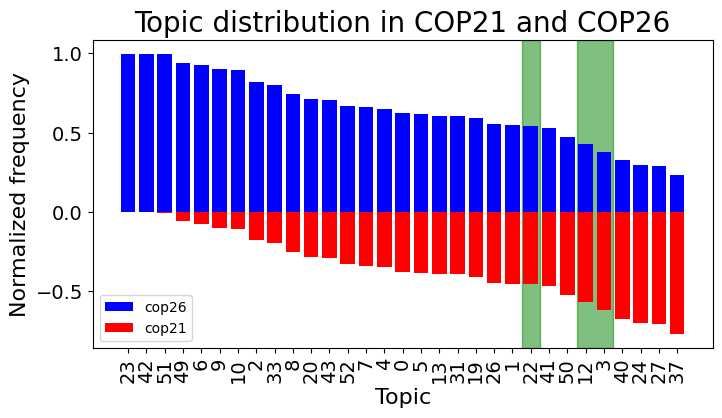

In [6]:
df_transposed = cop_topic.transpose().sort_values(by='cop26', ascending=False).reset_index()
df_transposed = df_transposed[df_transposed['topic'].astype('int').isin(list(res.keys()))]# get topics only in res.keys()
df_transposed['topic'] = df_transposed['topic'].astype('str')

# Create figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

ax.axvspan(24.5, 26.5, alpha=0.5, color='green')
ax.axvspan(21.5, 22.5, alpha=0.5, color='green')

ax.bar(df_transposed['topic'], df_transposed['cop26'], color='b', label='cop26')#  bar for cop26
ax.bar(df_transposed['topic'], -df_transposed['cop21'], color='r', label='cop21')# bar for cop21 in the opposite direction


# Set labels and title
ax.set_xlabel("Topic", fontsize=16)
ax.set_ylabel("Normalized frequency", fontsize=16)
ax.set_title("Topic distribution in COP21 and COP26", fontsize=20)
ax.legend()

# ticks size 
plt.tick_params(axis= 'both', which='major', labelsize=14)

#highlight topic '3' '1' and '12' 
#ax.axvspan(2.5, 3.5, alpha=0.5, color='green')

#xticks rotation
plt.xticks(rotation=90)

# SAVE FIG PDF 
plt.savefig('2x_topic_distribution.pdf', bbox_inches='tight', dpi=800)




topic 12 analysis 

Layer:  21
Number of nodes:  7184
Number of edges:  9177
10  influencers
3045  users connected to influencers
Layer:  26
Number of nodes:  6086
Number of edges:  7860
10  influencers
2761  users connected to influencers


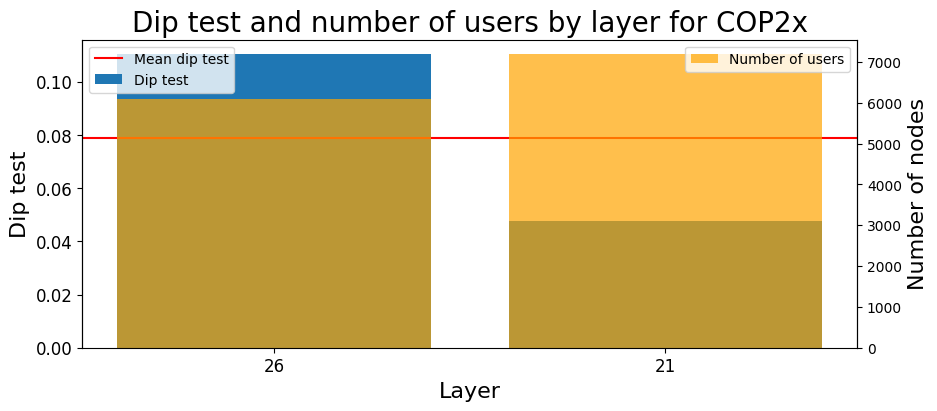

[(26, 'Climate Change Protests'), (21, 'Youth Voices for Climate Change and Empowerment')]
Most polarized topics:
26 Climate Change Protests
21 Youth Voices for Climate Change and Empowerment

Least polarized topics:
21 Youth Voices for Climate Change and Empowerment
26 Climate Change Protests


In [30]:
net1221 =  folder + 'networks/network1221.gml'
net1226 =  folder + 'networks/network1226.gml'

net1221 = nx.read_gml(net1221)
net1226 = nx.read_gml(net1226)

l = {21: net1221, 26: net1226}

res12 = get_polarization_by_layer(l, n_influencers = 10, n = 2)


stl = plot_dip_test(res12, l, topic_label = topic_label, cop_name='COP2x')

    # get network and df of correspondence analysis of the users 
 

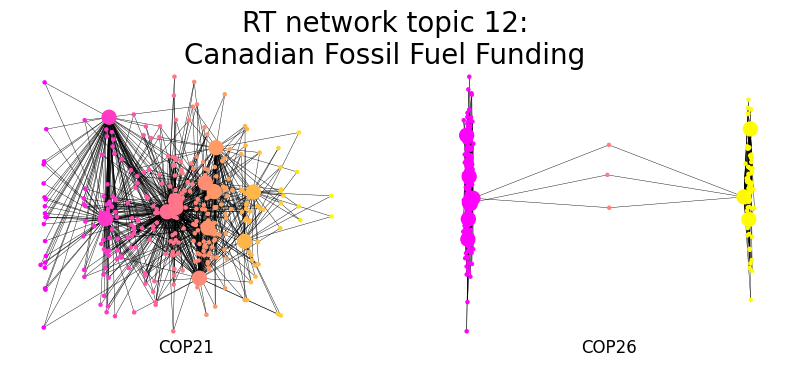

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0] = draw_network(21,ax[0], l, res12)
ax[0].set_title('COP21', y=-0.01)
ax[1] = draw_network(26, ax[1], l, res12)
ax[1].set_title('COP26', y=-0.01)

# fig title 
fig.suptitle('RT network topic 12:\n'+ topic_label[12], fontsize=20)


plt.savefig('2x_topic12_network.pdf', bbox_inches='tight', dpi=800)

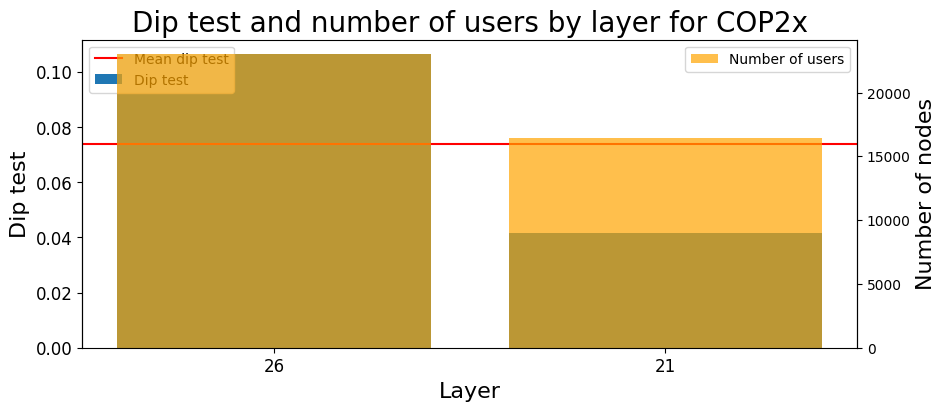

[(26, 'Climate Change Protests'), (21, 'Youth Voices for Climate Change and Empowerment')]
Most polarized topics:
26 Climate Change Protests
21 Youth Voices for Climate Change and Empowerment

Least polarized topics:
21 Youth Voices for Climate Change and Empowerment
26 Climate Change Protests
[(21, (0.04148049601723135, 0.032100009554382414)), (26, (0.10631679282484727, 0.0))]


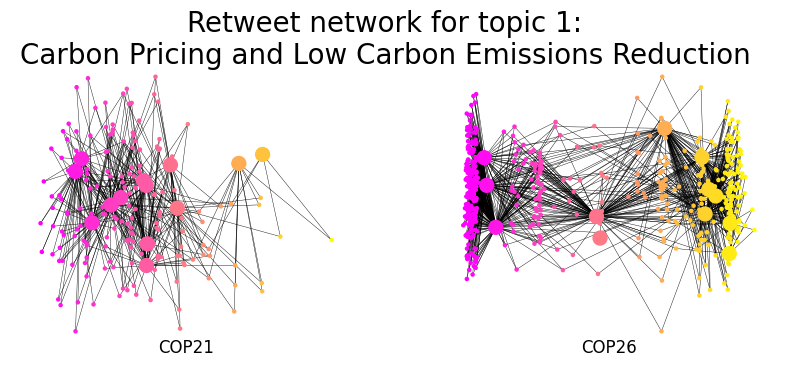

In [32]:
net121 =  folder + 'networks/network121.gml'
net126 = folder + 'networks/network126.gml'

net121 = nx.read_gml(net121)
net126 = nx.read_gml(net126)

l = {21: net121, 26: net126}

#res1 = get_polarization_by_layer(l, n_influencers = 12, n = 2)


stl = plot_dip_test(res1, l, topic_label=topic_label, cop_name='COP2x')


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0] = draw_network(21,ax[0], l, res1)
ax[0].set_title('COP21', y=-0.01)
ax[1] = draw_network(26, ax[1], l, res1)
ax[1].set_title('COP26', y = -0.01   )


# fig title
fig.suptitle('Retweet network for topic 1:\n'+ topic_label[1], fontsize=20)



plt.savefig('2x_topic1_network.pdf', bbox_inches='tight', dpi=800)

print([(k, v[0]) for k, v  in res1.items()])


Layer:  21
Number of nodes:  18700
Number of edges:  21237
15  influencers
6923  users connected to influencers
Layer:  26
Number of nodes:  12776
Number of edges:  13351
15  influencers
5212  users connected to influencers


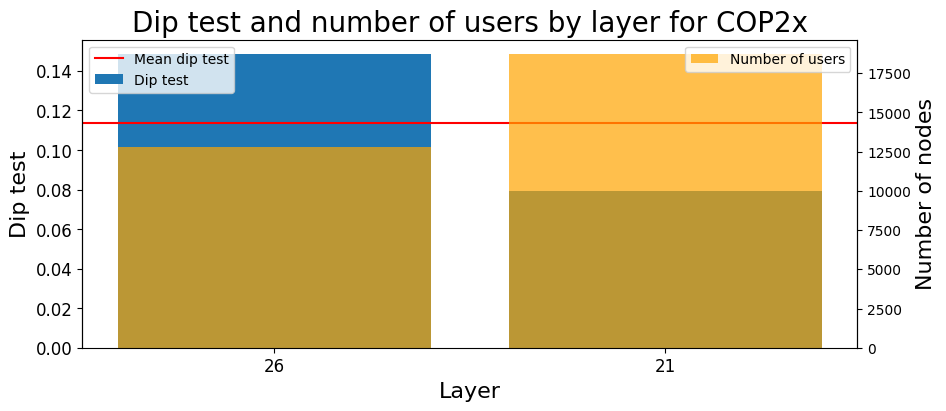

[(26, 'Climate Change Protests'), (21, 'Youth Voices for Climate Change and Empowerment')]
Most polarized topics:
26 Climate Change Protests
21 Youth Voices for Climate Change and Empowerment

Least polarized topics:
21 Youth Voices for Climate Change and Empowerment
26 Climate Change Protests


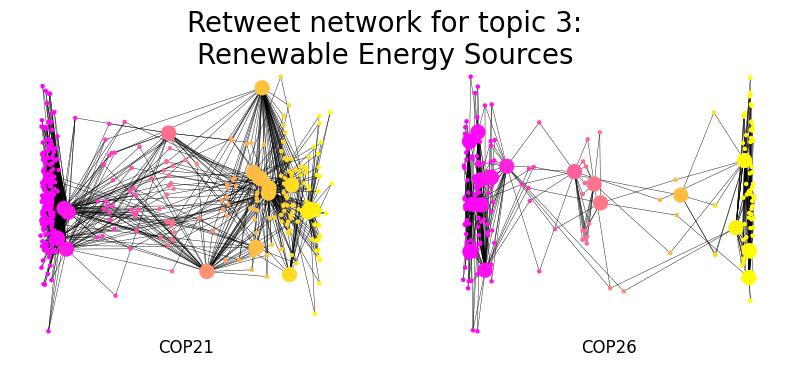

In [33]:
net31 =  folder + 'networks/network321.gml'
net36 = folder + 'networks/network326.gml'

net31 = nx.read_gml(net31)
net36 = nx.read_gml(net36)

l = {21: net31, 26: net36}

res3 = get_polarization_by_layer(l, n_influencers = 15, n = 2)


stl = plot_dip_test(res3, l, topic_label=topic_label, cop_name='COP2x')


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0] = draw_network(21,ax[0], l, res3)
ax[0].set_title('COP21', y=-0.01)
ax[1] = draw_network(26, ax[1], l, res3)
ax[1].set_title('COP26', y = -0.01)


# fig title
fig.suptitle('Retweet network for topic 3:\n'+ topic_label[3], fontsize=20)


plt.savefig('2x_topic3_network.pdf', bbox_inches='tight', dpi=800)

In [58]:
res

{3: ((0.04218395892381308, 0.0),
                    target     score
  0             1001283282 -0.920464
  1              100435990 -0.980440
  2              100457028 -0.977263
  3             1004694289  0.953481
  4              100885351 -0.923011
  ...                  ...       ...
  1495            99002747 -0.978280
  1496            99122519 -0.931500
  1497  992298764869160960  0.941187
  1498           993611670  0.931675
  1499           999036998 -0.934011
  
  [1500 rows x 2 columns],
                  source     score
  0             21150492  0.955225
  1            618625439  0.948127
  2           2963115155  0.936395
  3   730526974003838976  0.910721
  4             24782816  0.901214
  ..                 ...       ...
  92          4255658358 -0.971814
  93           355989081 -0.972676
  94            18839785 -0.976274
  95           471741741 -0.979925
  96            27308199 -1.000000
  
  [97 rows x 2 columns]),
 4: ((0.024152785997659406, 0.00018331528297

In [13]:
def plot_dip_test(res_l, layers_l , topic_label ,cop_name='COP'):

    # keys float to int

    #sort the result of the diptest 
    diptest = [(r[0], r[1][0][0]) for r in res_l.items()]
    diptest_s = sorted(diptest, key=lambda x: x[1], reverse=True)

    # add to diptest the number of nodes in each layer
    diptest_s = [(d[0], d[1], layers_l[d[0]].number_of_nodes()) for d in diptest_s]

    n_nodes = [layers_l[k].number_of_nodes() for k, v in res_l.items()]



    # grpuped bar chart witu n_nodes and diptest_s
    fig, ax = plt.subplots(figsize=(10,4))

    plt.title('Dip test and number of users by layer for ' + cop_name, fontsize=20)

    bars1 = ax.bar([str(d[0]) for d in diptest_s], [d[1] for d in diptest_s], label='Dip test')


    ax.set_ylabel('Dip test', fontdict={'fontsize': 16})
    ax.set_xlabel('Layer', fontdict={'fontsize': 16})
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.axhline(y=np.mean([d[1] for d in diptest_s]), color='r', linestyle='-', label='Mean dip test')

    ax2 = ax.twinx()
    ax2.bar([str(d[0]) for d in diptest_s], [d[2] for d in diptest_s], color='orange', label='Number of users', alpha=0.7)

    ax2.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # break ax 2 between 50000 and 90000
 
  # don't put tick labels at the top



    ax2.grid(False)
    # ax 2 opacity
    ax2.patch.set_alpha(0.5)
    
    ax2.set_ylabel('Number of nodes', fontdict={'fontsize': 16})
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    #bar widht 
    # i want tonly half of the xtiks
    plt.xticks([str(d[0]) for d in diptest_s], [str(d[0]) for d in diptest_s])
    

    plt.xticks([str(d[0]) for d in diptest_s], [str(d[0]) for d in diptest_s])
    plt.xticks(rotation=90, fontsize=14)     

    # add mean line to left axes 

    plt.show()

    fig.savefig('dip_test_' + cop_name + '.pdf',format= 'pdf' ,bbox_inches='tight', dpi=800)


    # print the most and least polarized topics according to this test 

    # sort topic label according to diptest_s mantain keys
    sorted_topic_label = [(k[0], topic_label[k[0]]) for k  in diptest_s]

    print(sorted_topic_label)

    # print 10 most and least polarized topics one per line
    print('Most polarized topics:')
    for i in range(min(10, len(sorted_topic_label))):
        print(sorted_topic_label[i][0], sorted_topic_label[i][1])
    print('')
    print('Least polarized topics:')
    for i in range(min(10, len(sorted_topic_label))):
        print(sorted_topic_label[-i-1][0], sorted_topic_label[-i-1][1])


    return sorted_topic_label